# **LAB 1**

========== RAW MARKETING DATA (FIRST 10 ROWS) ==========
   Ad_Spend_USD  New_Customers
0           120       4.070492
1           150       5.535669
2           180       7.816841
3           200       5.222595
4           220       5.187260
5           250       6.247364
6           270       8.773103
7           300       8.493127
8           320       7.605360
9           350       9.769901 



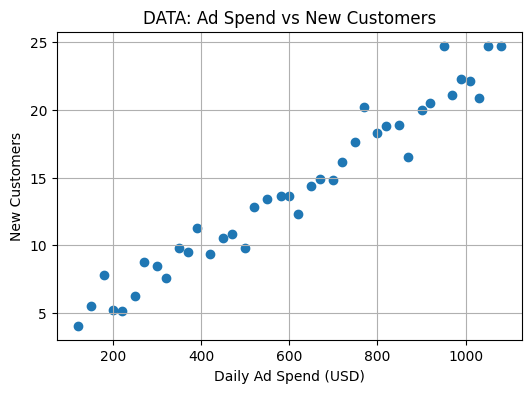

========== MODEL SUMMARY ==========
Model Equation: New_Customers = 1.923 + 0.02019 * Ad_Spend_USD

========== MODEL PERFORMANCE ==========
MAE  (Mean Absolute Error) : 1.247
RMSE (Root Mean Sq. Error) : 1.478
R² (Explained Variance)    : 0.9399



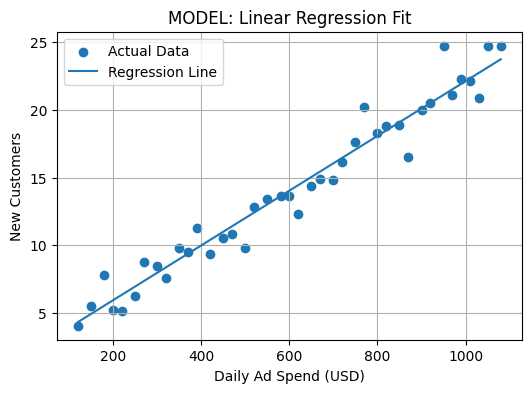

========== DECISION SCENARIO ==========
If we spend $500/day → Expected customers ≈ 12.02
If we spend $800/day → Expected customers ≈ 18.08

Extra customers gained by increasing spend from $500 to $800:
    Extra customers ≈ 6.06
    Extra spend     = $300
    Cost per extra customer ≈ $49.53

========== MANAGERIAL DECISION ==========
Recommended: Increasing ad budget from $500 to $800 is cost-effective.


In [7]:
# ============================================================
# MARKETING EXAMPLE: 1 INPUT VARIABLE → 1 OUTPUT → DECISION
# Scenario:
#   X = Daily Digital Ad Spend (USD)
#   y = Daily New Customers Acquired
#
# Pipeline:  Data → Model → Decision
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------
# 1. DATA: CREATE MARKETING DATA
# -------------------------------

#np.random.seed(42)  # for reproducibility

#40 days of digital ad spend (in USD)
#ad_spend = np.linspace(100, 1000, 40)  # from $100 to $1000#


ad_spend = np.array([
    120, 150, 180, 200, 220, 250, 270, 300, 320, 350,
    370, 390, 420, 450, 470, 500, 520, 550, 580, 600,
    620, 650, 670, 700, 720, 750, 770, 800, 820, 850,
    870, 900, 920, 950, 970, 990, 1010, 1030, 1050, 1080
])





# Assume: on average, every extra $50 brings ~1 more customer, plus some noise
true_slope = 1 / 50   # customers per $1
true_intercept = 2    # base customers even with low spend

noise = np.random.normal(loc=0, scale=1.5, size=40)  # random noise

new_customers = true_intercept + true_slope * ad_spend + noise

# Put into a DataFrame
df = pd.DataFrame({
    "Ad_Spend_USD": ad_spend,
    "New_Customers": new_customers
})

print("========== RAW MARKETING DATA (FIRST 10 ROWS) ==========")
print(df.head(10), "\n")

# Quick visualization of Data (Ad Spend vs New Customers)
plt.figure(figsize=(6, 4))
plt.scatter(df["Ad_Spend_USD"], df["New_Customers"])
plt.xlabel("Daily Ad Spend (USD)")
plt.ylabel("New Customers")
plt.title("DATA: Ad Spend vs New Customers")
plt.grid(True)
plt.show()






# ---------------------------------
# 2. MODEL: TRAIN LINEAR REGRESSION
# ---------------------------------

X = df[["Ad_Spend_USD"]]   # input (1 variable)
y = df["New_Customers"]    # output

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)





# Model parameters (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

print("========== MODEL SUMMARY ==========")
print(f"Model Equation: New_Customers = {intercept:.3f} + {slope:.5f} * Ad_Spend_USD\n")

# Predictions & evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)




print("========== MODEL PERFORMANCE ==========")
print(f"MAE  (Mean Absolute Error) : {mae:.3f}")
print(f"RMSE (Root Mean Sq. Error) : {rmse:.3f}")
print(f"R² (Explained Variance)    : {r2:.4f}\n")





# Plot regression line on all data
plt.figure(figsize=(6, 4))
plt.scatter(df["Ad_Spend_USD"], df["New_Customers"], label="Actual Data")
x_line = np.linspace(df["Ad_Spend_USD"].min(), df["Ad_Spend_USD"].max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, label="Regression Line")
plt.xlabel("Daily Ad Spend (USD)")
plt.ylabel("New Customers")
plt.title("MODEL: Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()





# ---------------------------------------------------
# 3. DECISION: USE MODEL FOR MANAGERIAL DECISION-MAKING
# ---------------------------------------------------

# Example decisions for top roles (Marketing Manager / CMO)

# Scenario A: If we spend $500 per day, how many customers do we expect?
spend_A = 500
pred_A = model.predict(np.array([[spend_A]]))[0]

# Scenario B: If we increase budget to $800 per day, what happens?
spend_B = 800
pred_B = model.predict(np.array([[spend_B]]))[0]

# Compute marginal gain from increasing spend_A → spend_B
extra_customers = pred_B - pred_A
extra_spend = spend_B - spend_A
cost_per_extra_customer = extra_spend / extra_customers if extra_customers != 0 else np.inf

print("========== DECISION SCENARIO ==========")
print(f"If we spend ${spend_A:.0f}/day → Expected customers ≈ {pred_A:.2f}")
print(f"If we spend ${spend_B:.0f}/day → Expected customers ≈ {pred_B:.2f}\n")

print("Extra customers gained by increasing spend from $500 to $800:")
print(f"    Extra customers ≈ {extra_customers:.2f}")
print(f"    Extra spend     = ${extra_spend:.0f}")
print(f"    Cost per extra customer ≈ ${cost_per_extra_customer:.2f}\n")




# Simple decision rule
if cost_per_extra_customer < 50:
    decision = "Recommended: Increasing ad budget from $500 to $800 is cost-effective."
else:
    decision = "Not Recommended: Extra cost per customer is too high; reconsider budget."




print("========== MANAGERIAL DECISION ==========")
print(decision)




